# Центральная предельная теорема своими руками

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Для выполнения задания мною быо выбрано Бета-распределение
(https://ru.wikipedia.org/wiki/Бета-распределение)

Мат. ожидание: $E[X] = \frac{\alpha}{\alpha+\beta}$

Дисперсия: $D[X] = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$

In [225]:
a,b = .5, .9
beta = sts.beta(a,b)

График функции распределения

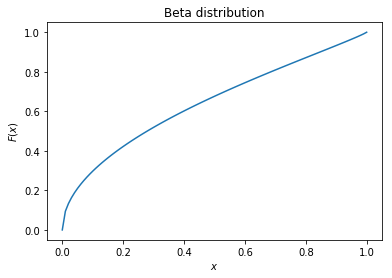

In [226]:
x = np.linspace(0,1,100)

cdf = beta.cdf(x) 
plt.plot(x, cdf)
plt.title('Beta distribution',loc='center')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.show()

График плотности вероятности

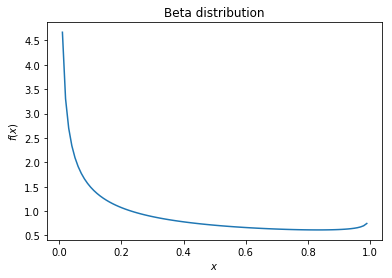

In [227]:
x = np.linspace(0,1,100)

pdf = beta.pdf(x)
plt.plot(x, pdf)

plt.title('Beta distribution',loc='center')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Посчитаем теоритические параметры по формулам, представленным выше

In [228]:
mu = a / (a + b) #мат. ожидание 
d = (a * b) / ((a + b)**2 * (a + b + 1)) #дисперсия
sigma = np.sqrt(d) #СКО
print 'Мат. ожидание = %.3f' % mu
print 'Дисперсия = %.3f' % d
print 'Сигма = %.3f' % sigma

Мат. ожидание = 0.357
Дисперсия = 0.096
Сигма = 0.309


Гистограмма выборки и ее теоритическая плотность распределения

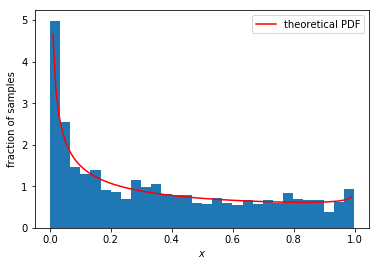

In [229]:
sample = beta.rvs(1000)
x = np.linspace(0,1,100)
pdf = beta.pdf(x)

plt.plot(x, pdf,'r',label='theoretical PDF')
plt.hist(sample, bins=30, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='best')
plt.show()

### Оценим теперь распределение выборочного среднего при разных объёмах выборок

### n = 5

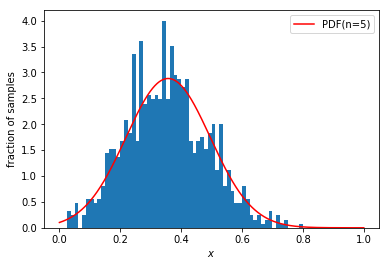

In [230]:
n = 5
sample_hist5 = np.array([])
for i in range(1000):
    sample = beta.rvs(n) #генерация выборки
    mean = sum(sample) / n #определение выборочного среднего (в.с.)
    sample_hist5 = np.append(sample_hist5, mean)
    
D = d / n
sigma = np.sqrt(D) #необходимо пересчиать сигму, поделив ранее полученное значение на n
x = np.linspace(0,1,1000) 
norm_rv = sts.norm(mu,sigma) 
pdf = norm_rv.pdf(x)
plt.hist(sample_hist5, bins = 80, range=(0,1), normed=True)
plt.plot(x, pdf,'r', label='PDF(n=5)')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='best')
plt.show()

### n = 10

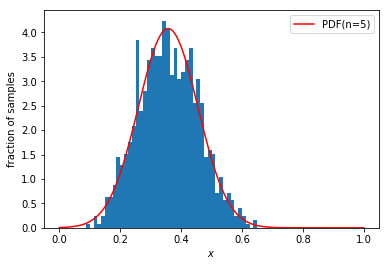

In [231]:
n = 10
sample_hist10 = np.array([])
for i in range(1000):
    sample = beta.rvs(n) #генерация выборки
    mean = sum(sample) / n #определение выборочного среднего (в.с.)
    sample_hist10 = np.append(sample_hist10, mean)

D = d / n
sigma = np.sqrt(D) #необходимо пересчиать сигму, поделив ранее полученное значение на n
x = np.linspace(0,1,1000)
norm_rv = sts.norm(mu,sigma) 
pdf = norm_rv.pdf(x)
plt.hist(sample_hist10, bins = 80, range=(0,1), normed=True)
plt.plot(x, pdf,'r', label='PDF(n=5)')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='best')
plt.show()

### n = 50

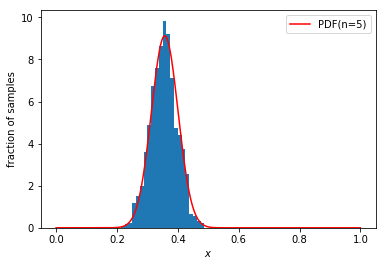

In [233]:
n = 50
sample_hist50 = np.array([])
for i in range(1000):
    sample = beta.rvs(n) #генерация выборки
    mean = sum(sample) / n #определение выборочного среднего (в.с.)
    sample_hist50 = np.append(sample_hist50, mean)

D = d / n
sigma = np.sqrt(D) #необходимо пересчиать сигму, поделив ранее полученное значение на n
x = np.linspace(0,1,1000)
norm_rv = sts.norm(mu,sigma) 
pdf = norm_rv.pdf(x)
plt.hist(sample_hist50, bins = 80, range=(0,1), normed=True)
plt.plot(x, pdf,'r', label='PDF(n=5)')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='best')
plt.show()

По полученным выше графикам можно увидеть, что точность апроксимации выборочных срених бета-распределения нормальным с возрастанием $n$ только увеличивается. И уже при $n = 10$ гистограмма распределения становится похожей на нормальное распределение.